In [1]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(7)
#데이터 로딩, 시작36행은 건너뜀
data = np.genfromtxt("c:/vscode/data/regression/x09.txt", skip_header=36)
data[:10]

array([[  1.,   1.,  84.,  46., 354.],
       [  2.,   1.,  73.,  20., 190.],
       [  3.,   1.,  65.,  52., 405.],
       [  4.,   1.,  70.,  30., 263.],
       [  5.,   1.,  76.,  57., 451.],
       [  6.,   1.,  69.,  25., 302.],
       [  7.,   1.,  63.,  28., 288.],
       [  8.,   1.,  72.,  36., 385.],
       [  9.,   1.,  79.,  57., 402.],
       [ 10.,   1.,  75.,  44., 365.]])

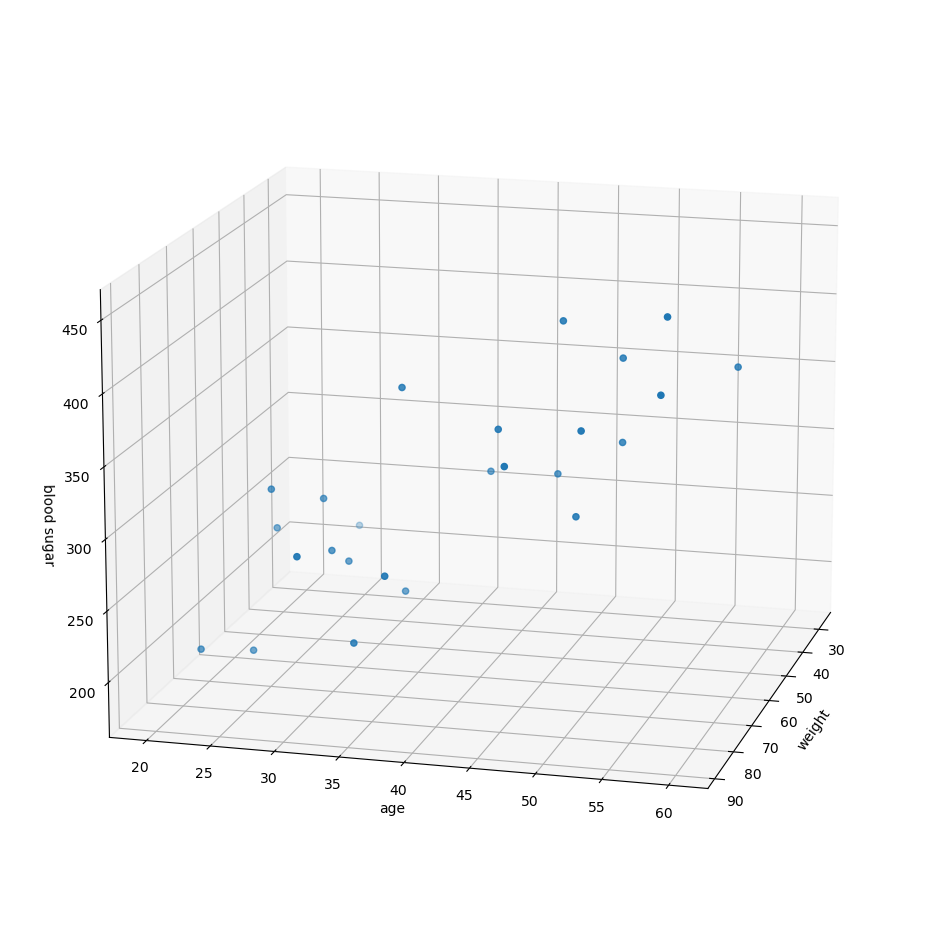

In [2]:
from mpl_toolkits.mplot3d import Axes3D
xdata=np.array(data[:,2],dtype=np.float32)
ydata=np.array(data[:,3],dtype=np.float32)
zdata=np.array(data[:,4],dtype=np.float32)

fig=plt.figure(figsize=(12,12))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(xdata,ydata,zdata)
ax.set_xlabel("weight")
ax.set_ylabel("age")
ax.set_zlabel("blood sugar")
ax.view_init(15,15) #출력 각도 설정
plt.show()

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop

#데이터를 케라스에 맞게 변환
#독립변수
x_data=np.array(data[:,2:4],dtype=np.float32)
#종속변수
y_data=np.array(data[:,4],dtype=np.float32)

#회귀분석 모델 생성
model=Sequential()
model.add(Dense(1,input_shape=(2,)))

rmsprop=RMSprop(learning_rate=0.01) #학습률 0.01
model.compile(loss='mse',optimizer=rmsprop)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


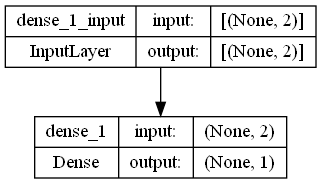

In [8]:
from keras.utils import plot_model
plot_model(model, show_shapes=True)

In [ ]:
hist=model.fit(x_data, y_data, epochs=1000)
# print(hist.history.keys())

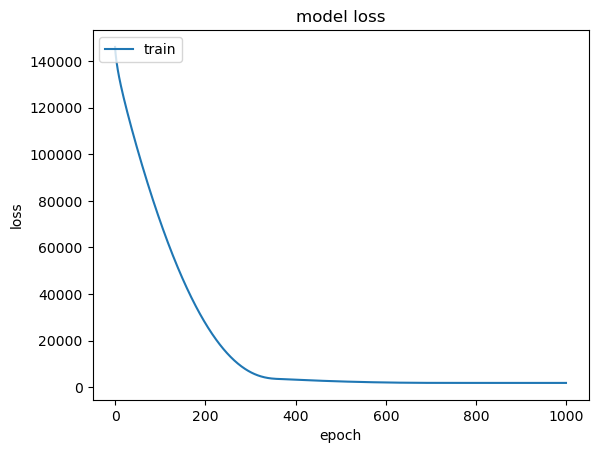

In [7]:
plt.plot(hist.history["loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train"],loc="upper left")
plt.show()

In [9]:
#새로운 데이터로 예측
model.predict(np.array([100,40]).reshape(1,2))
    # model.predict([[100,40]])     체중, 나이 -> 당수치 얼마

1/1 [==============================] - 0s 78ms/step


array([[350.5075]], dtype=float32)

In [11]:
#회귀선을 그리기 위한 작업
#가중치와 절편,편향(bias)
w, b =model.get_weights()
w, b

(array([[1.193667],
        [5.543364]], dtype=float32),
 array([9.406262], dtype=float32))

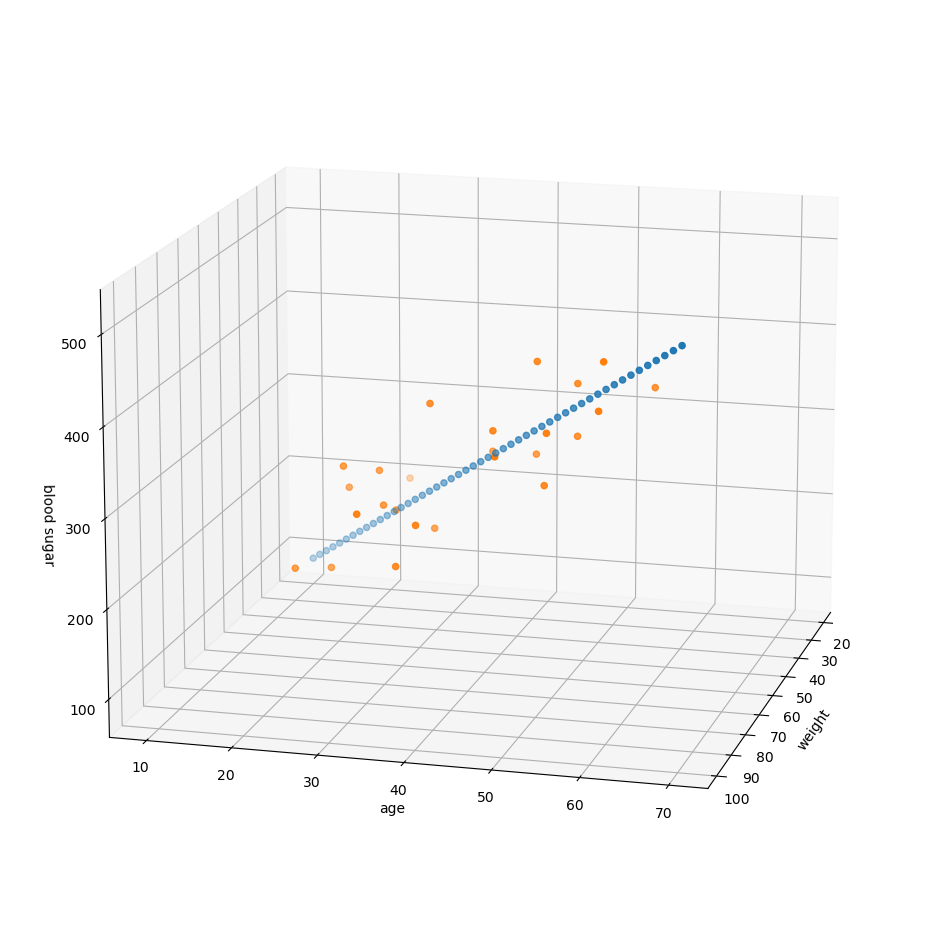

In [12]:
# linspace(start, stop, num=50, endpoint=True,retstep=False, dtype=None)
# start부터 stop의 범위에서 num개를 균일한 간격으로 데이터를 생성하고 배열을 만드는 함수
x=np.linspace(20,100,50).reshape(50,1)
y=np.linspace(10,70,50).reshape(50,1)
x2=np.concatenate((x,y),axis=1) #x,y연결

#행렬곱셈
z=np.matmul(x2,w)+b
fig=plt.figure(figsize=(12,12))
ax=fig.add_subplot(111,projection='3d')

#회귀선
ax.scatter(x,y,z)
#산점도
ax.scatter(xdata,ydata,zdata)
ax.set_xlabel("weight")
ax.set_ylabel("age")
ax.set_zlabel("blood sugar")
ax.view_init(15,15)
plt.show()

#### 회귀분석2(주택가격)

In [8]:
from keras.datasets import boston_housing
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

57026/57026 [==============================] - 0s 1us/step


<AxesSubplot:>

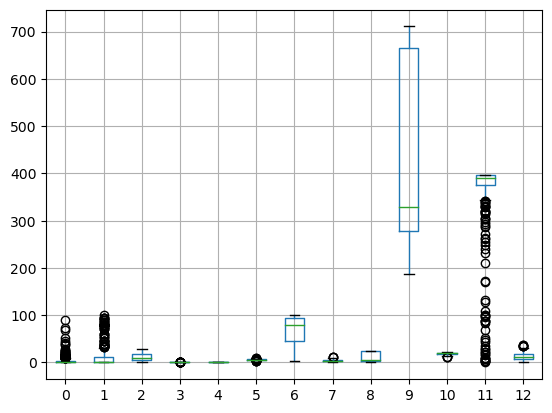

In [9]:
import pandas as pd
pd.DataFrame(X_train).boxplot()

<AxesSubplot:>

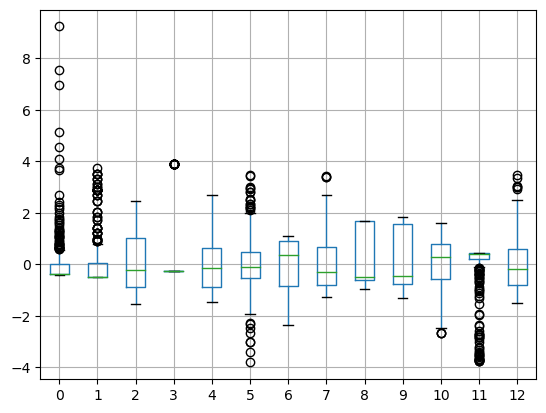

In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler() #평균 0, 표준편차 1로 만드는 스케일러
scaler.fit(X_train)

X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
pd.DataFrame(X_train_scaled).boxplot()

In [12]:
from keras import models, layers
#64개의 노드를 가진 은닉층 2개의 신경망
def build_model():
    model = models.Sequential()
    #relu
    model.add(layers.Dense(64, activation='relu',
                input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model
model = build_model()

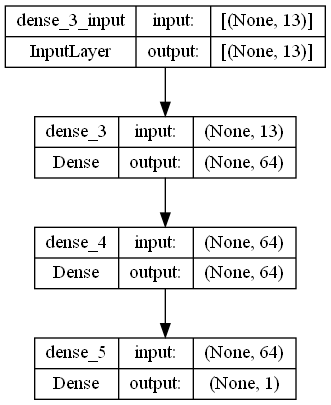

In [16]:
from keras.utils import plot_model
plot_model(model, show_shapes=True)

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                896       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [13]:
# 모델 학습
hist=model.fit(X_train_scaled, y_train, epochs=100, batch_size=64, verbose=1)

# 검증용 데이터로 모델 평가
mse, mae = model.evaluate(X_test_scaled, y_test, verbose=1)
print(mse)
print(mae)

Epoch 1/100
7/7 [==============================] - 1s 7ms/step - loss: 568.8664 - mae: 21.9777
Epoch 2/100
7/7 [==============================] - 0s 9ms/step - loss: 517.3358 - mae: 20.7802
Epoch 3/100
7/7 [==============================] - 0s 7ms/step - loss: 467.5997 - mae: 19.5972
Epoch 4/100
7/7 [==============================] - 0s 6ms/step - loss: 416.9651 - mae: 18.3140
Epoch 5/100
7/7 [==============================] - 0s 4ms/step - loss: 363.4142 - mae: 16.8913
Epoch 6/100
7/7 [==============================] - 0s 5ms/step - loss: 308.7549 - mae: 15.3507
Epoch 7/100
7/7 [==============================] - 0s 5ms/step - loss: 252.5016 - mae: 13.6263
Epoch 8/100
7/7 [==============================] - 0s 5ms/step - loss: 201.7107 - mae: 11.9175
Epoch 9/100
7/7 [==============================] - 0s 5ms/step - loss: 156.1279 - mae: 10.0975
Epoch 10/100
7/7 [==============================] - 0s 4ms/step - loss: 120.4661 - mae: 8.5643
Epoch 11/100
7/7 [==============================] 

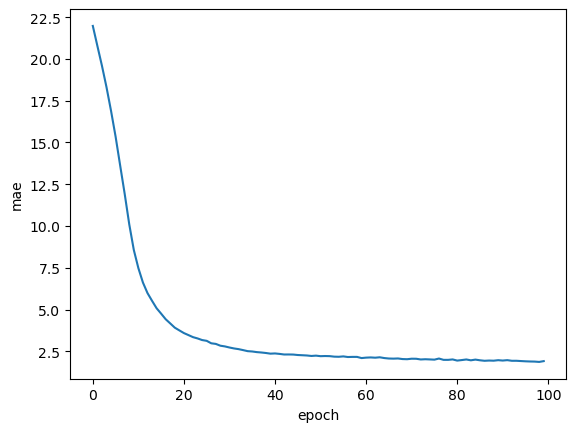

In [14]:
import matplotlib.pyplot as plt
plt.plot(hist.history["mae"])
plt.ylabel("mae")
plt.xlabel("epoch")
plt.show()

In [17]:
from keras.models import load_model

model.save('mymodel.h5')
del model
model = load_model('mymodel.h5')

# netron에서 모델 열기

#### iris 데이터

In [18]:
import seaborn as sns
#붓꽃 데이터셋 로딩
iris = sns.load_dataset("iris")
#품종 확인
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [19]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

X=iris.iloc[:, :4].values # 독립변수
y=iris.iloc[:,4].values #종속변수

encoder=LabelEncoder() #문자열에 label을 붙임
y1=encoder.fit_transform(y)
print(y1[:5])

y2=pd.get_dummies(y1).values #종속변수에 대한 원핫인코딩 처리
print(y2[:5])

[0 0 0 0 0]
[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [20]:
#학습용, 검증용 데이터셋 구분
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y2,
                test_size=0.2, stratify=y,random_state=10)

#모델 생성
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64,input_shape=(4,),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy',
        optimizer='adam', metrics=['accuracy'])

hist = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 5ms/step - loss: 1.1069 - accuracy: 0.3333
Epoch 2/100
4/4 [==============================] - 0s 6ms/step - loss: 0.9791 - accuracy: 0.3083
Epoch 3/100
4/4 [==============================] - 0s 7ms/step - loss: 0.8919 - accuracy: 0.6833
Epoch 4/100
4/4 [==============================] - 0s 6ms/step - loss: 0.8026 - accuracy: 0.7833
Epoch 5/100
4/4 [==============================] - 0s 7ms/step - loss: 0.7405 - accuracy: 0.6667
Epoch 6/100
4/4 [==============================] - 0s 23ms/step - loss: 0.6845 - accuracy: 0.6667
Epoch 7/100
4/4 [==============================] - 0s 9ms/step - loss: 0.6355 - accuracy: 0.7083
Epoch 8/100
4/4 [==============================] - 0s 7ms/step - loss: 0.5866 - accuracy: 0.8667
Epoch 9/100
4/4 [==============================] - 0s 6ms/step - loss: 0.5516 - accuracy: 0.9333
Epoch 10/100
4/4 [==============================] - 0s 6ms/step - loss: 0.5192 - accuracy: 0.9083
Epoch 11/100
4/4 [==========

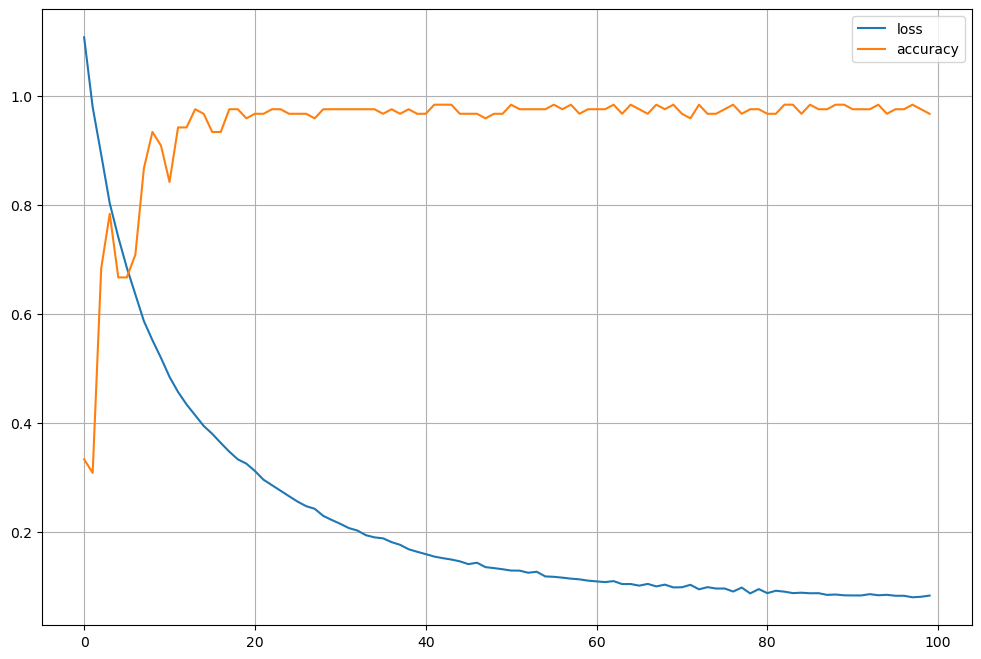

In [21]:
#그래프 출력
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.plot(hist.history['loss']) #손실률
plt.plot(hist.history['accuracy']) #정확도
plt.legend(['loss','accuracy'])
plt.grid()
plt.show()


In [22]:
#모델 평가
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("정확도 = {:.2f}".format(accuracy))

정확도 = 1.00


In [23]:
import numpy as np
from sklearn.metrics import confusion_matrix

pred = model.predict(X_test)
print(pred[:10])

y_test_class = np.argmax(y_test,axis=1)
pred_class = np.argmax(pred,axis=1)
print(y_test_class[:10])
print(pred_class[:10])
print(confusion_matrix(y_test_class,pred_class))

1/1 [==============================] - 0s 51ms/step
[[1.6430442e-03 9.0133679e-01 9.7020082e-02]
 [9.9516451e-01 4.8354045e-03 1.3463372e-07]
 [1.5753935e-03 5.7934690e-01 4.1907766e-01]
 [4.1664983e-04 4.1527405e-01 5.8430934e-01]
 [1.5753694e-02 9.7999781e-01 4.2484966e-03]
 [6.0559240e-05 9.1510013e-02 9.0842944e-01]
 [9.9435472e-01 5.6450944e-03 2.9000273e-07]
 [1.4057414e-05 1.3469886e-02 9.8651600e-01]
 [6.7820733e-06 6.9941301e-03 9.9299908e-01]
 [9.9969423e-01 3.0577395e-04 7.6556228e-10]]
[1 0 1 2 1 2 0 2 2 0]
[1 0 1 2 1 2 0 2 2 0]
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


In [24]:
model.save('iris.h5')

#### titanic

In [25]:
df = pd.read_csv('c:/vscode/data/titanic/train3.csv')

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

#한글 처리를 위해 폰트 설정
font_name = font_manager.FontProperties(
fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

c:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


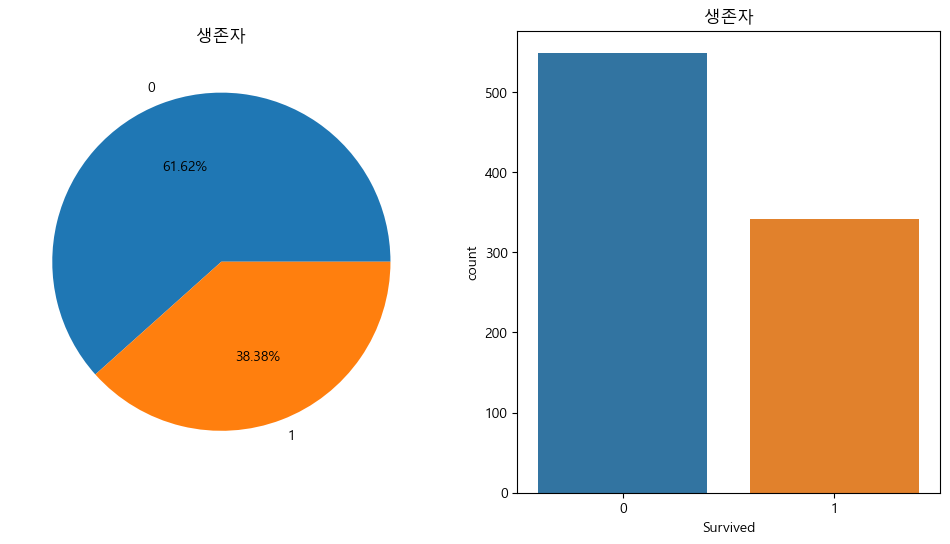

In [28]:
f,ax = plt.subplots(1,2,figsize=(12,6))
df['Survived'].value_counts().plot.pie(autopct='%1.2f%%', ax=ax[0])
ax[0].set_title('생존자')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df, ax=ax[1])
ax[1].set_title('생존자')
plt.show()

<AxesSubplot:>

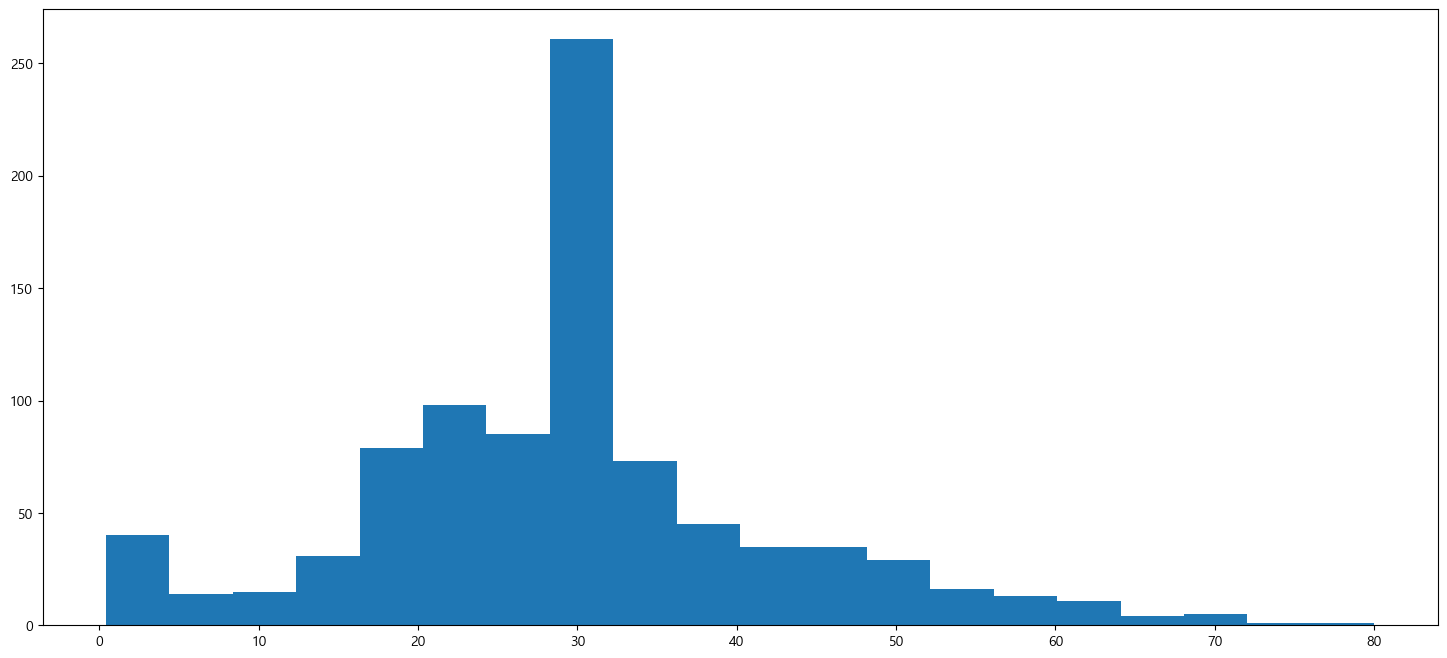

In [30]:
#승객들의 연령 분포
df['Age'].hist(bins=20, figsize=(18,8), grid=False)

In [32]:
#객실등급별 통계
df.groupby('Pclass1').mean()
df.groupby('Pclass2').mean()
df.groupby('Pclass3').mean()

,Survived,Pclass1,Pclass2,male,female,Age,SibSp,Parch,Fare
Pclass3,,,,,,,,,
0,0.557500,0.54,0.46,0.575000,0.425000,33.775625,0.410000,0.367500,54.948135
1,0.242363,0.00,0.00,0.706721,0.293279,26.486599,0.615071,0.393075,13.675550


c:\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
c:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


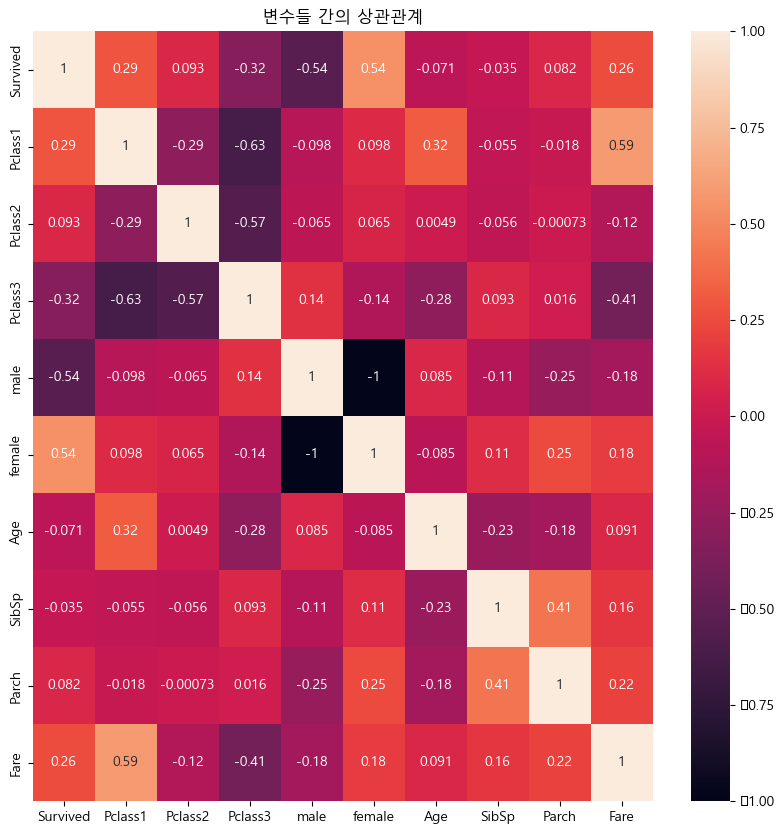

In [33]:
#상관관계 분석
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, linecolor='white')
plt.title('변수들 간의 상관관계')
plt.show()

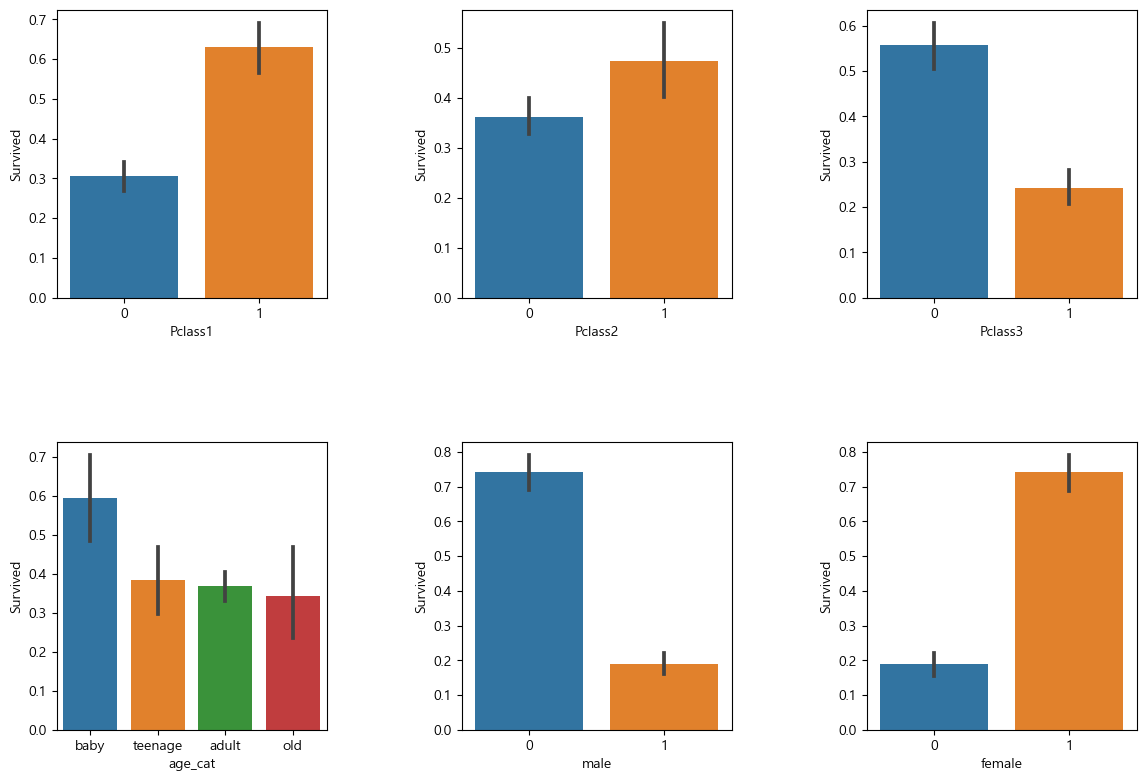

In [34]:
#연령대를 나눠서 분석
df['age_cat'] = pd.cut(df['Age'], bins=[0,10,20,50,100], 
                       include_lowest=True, labels=['baby','teenage','adult','old'])
plt.figure(figsize=[12,8])
plt.subplot(231)

sns.barplot(x='Pclass1', y='Survived', data=df)
plt.subplot(232)
sns.barplot(x='Pclass2', y='Survived', data=df)
plt.subplot(233)
sns.barplot(x='Pclass3', y='Survived', data=df)
plt.subplot(234)

sns.barplot(x='age_cat', y='Survived', data=df)
plt.subplot(235)

sns.barplot(x='male',y='Survived',data=df)
plt.subplot(236)
sns.barplot(x='female',y='Survived',data=df)
plt.subplots_adjust(top=1, bottom=0.1, left=0.10, right=1, hspace=0.5, wspace=0.5)
plt.show()

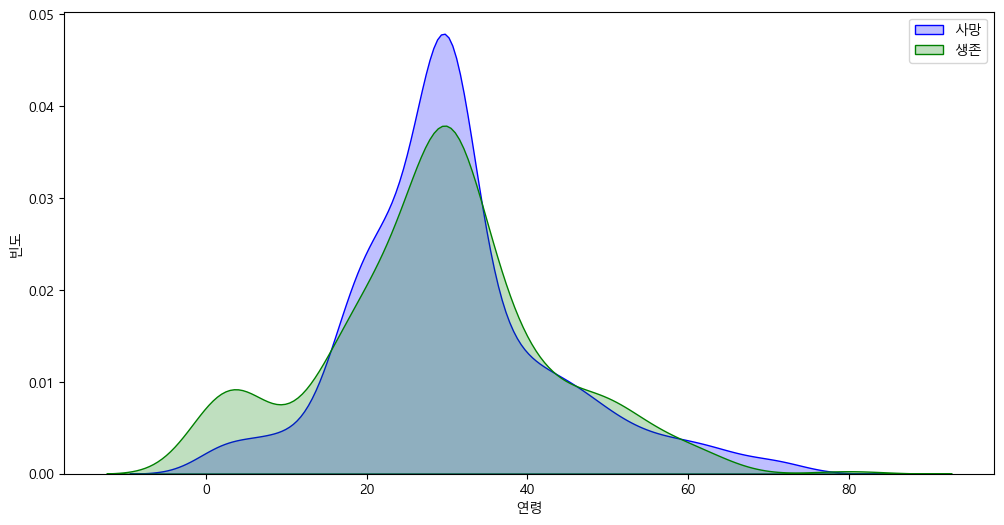

In [35]:
#나이 분포 곡선
f, ax = plt.subplots(figsize=(12,6))

g = sns.kdeplot(df['Age'][(df['Survived']==0)],
                ax=ax, color='blue', shade=True)
g = sns.kdeplot(df['Age'][(df['Survived']==1)],
                ax=ax, color='green', shade=True)
g.set_xlabel("연령")
g.set_ylabel("빈도")
g.legend(["사망","생존"])

In [37]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [38]:
train_cols=df.columns[1:-1]
X=df[train_cols] #독립변수
y=df['Survived'] #종속변수

In [39]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X,y)
X_samp = pd.DataFrame(data=X_sample, columns=train_cols)
y_samp = pd.DataFrame(data=y_sample, columns=['Survived'])
df_samp = pd.concat([X_samp, y_samp], axis=1)

X = X_samp[train_cols]
y = y_samp['Survived']

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size=0.2, random_state=7)

In [43]:
# keras 모델 구성 (노드, 독립변수, 활성화함수)
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(128, input_shape=(len(X_train.columns), ), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#모델 학습과정 설정
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

<AxesSubplot:>

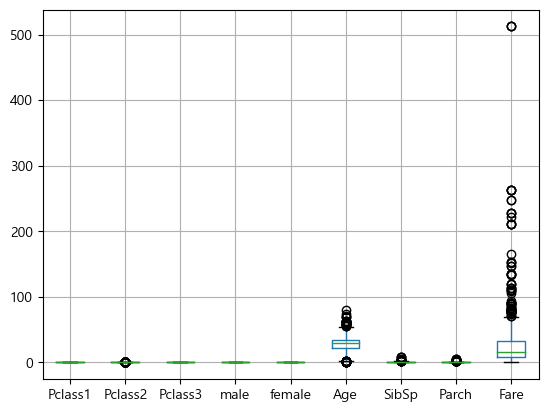

In [44]:
X_train.boxplot()

<AxesSubplot:>

c:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


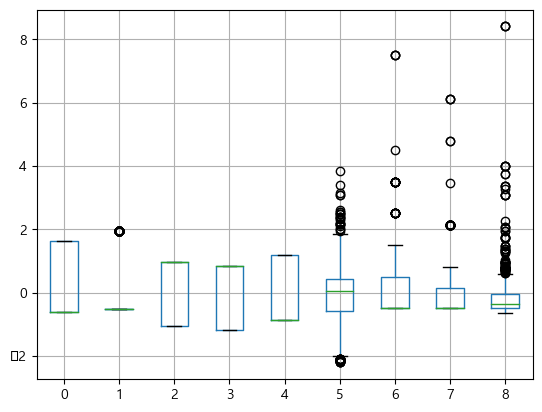

In [45]:
# 스케일링
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled=pd.DataFrame(X_train_scaled)
X_test_scaled=pd.DataFrame(X_test_scaled)

X_train_scaled.boxplot()

In [46]:
# 스케일링 모델 저장
from joblib import dump
dump(scaler, 'c:/vscode/data/titanic/scaler.model', compress=True)

['c:/vscode/data/titanic/scaler.model']

Epoch 1/500
18/18 [==============================] - 1s 7ms/step - loss: 0.1940 - accuracy: 0.7404
Epoch 2/500
18/18 [==============================] - 0s 16ms/step - loss: 0.1464 - accuracy: 0.8062
Epoch 3/500
18/18 [==============================] - 0s 6ms/step - loss: 0.1401 - accuracy: 0.7952
Epoch 4/500
18/18 [==============================] - 0s 4ms/step - loss: 0.1368 - accuracy: 0.8026
Epoch 5/500
18/18 [==============================] - 0s 3ms/step - loss: 0.1346 - accuracy: 0.8062
Epoch 6/500
18/18 [==============================] - 0s 4ms/step - loss: 0.1331 - accuracy: 0.8263
Epoch 7/500
18/18 [==============================] - 0s 3ms/step - loss: 0.1323 - accuracy: 0.8245
Epoch 8/500
18/18 [==============================] - 0s 3ms/step - loss: 0.1302 - accuracy: 0.8300
Epoch 9/500
18/18 [==============================] - 0s 4ms/step - loss: 0.1285 - accuracy: 0.8300
Epoch 10/500
18/18 [==============================] - 0s 6ms/step - loss: 0.1267 - accuracy: 0.8336
Epoch 11

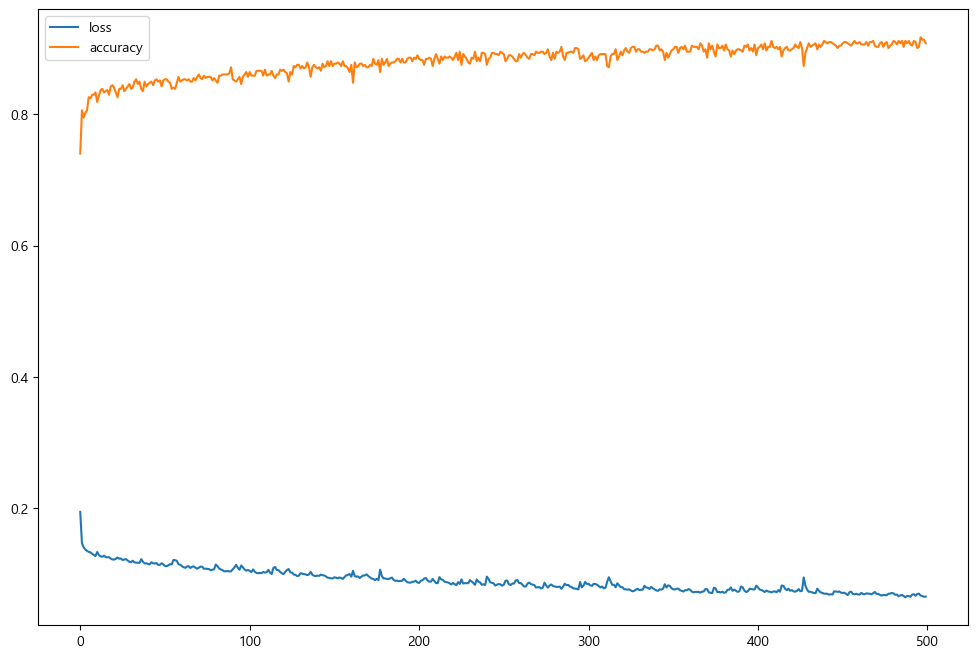

In [47]:
#모델 학습
hist = model.fit(X_train_scaled, y_train, epochs=500)
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
plt.legend(['loss', 'accuracy'])
plt.show()

In [48]:
#모델 평가
#학습용
scores = model.evaluate(X_train_scaled, y_train, verbose=1)
print(scores)
print('%s: %.2f%%' %(model.metrics_names[1], scores[1]*100))

18/18 [==============================] - 0s 4ms/step - loss: 0.0603 - accuracy: 0.9196
[0.06032678112387657, 0.9195612668991089]
accuracy: 91.96%


In [49]:
#검증용
scores = model.evaluate(X_test_scaled, y_test, verbose=1)
print(scores)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

5/5 [==============================] - 0s 3ms/step - loss: 0.2075 - accuracy: 0.7372
[0.20754776895046234, 0.7372262477874756]
accuracy: 73.72%


In [50]:
#3등석, 남성, 19세, 형제자매2, 부모자녀0, 요금50
person1 = [[0, 0, 1, 1, 0, 19, 2, 0, 50]]
#1등석, 여성, 17세, 형제자매0, 부모자녀2, 요금30
person2 = [[1, 0, 0, 0, 1, 17, 0, 2, 30]]
#2등석, 여성, 40세, 형제자매1, 부모자녀1, 요금70
person3 = [[0, 1, 0, 0, 1, 40, 1, 1, 70]]

#스케일링을 해야 할 경우
person1=scaler.transform(person1)
person2=scaler.transform(person2)
person3=scaler.transform(person3)

c:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [53]:
print(model.predict(person1))
print(model.predict(person2))
print(model.predict(person3))

1/1 [==============================] - 0s 28ms/step
[[2.9890438e-05]]
1/1 [==============================] - 0s 22ms/step
[[1.]]
1/1 [==============================] - 0s 22ms/step
[[1.]]


In [51]:
#모형을 지정한 디렉토리에 저장
model.save('c:/vscode/data/titanic/titanic.h5')

#### ozone 데이터

In [24]:
import pandas as pd
df = pd.read_csv("c:/vscode/data/ozone/ozone2.csv")

c:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0: 부족, 1: 정상)')

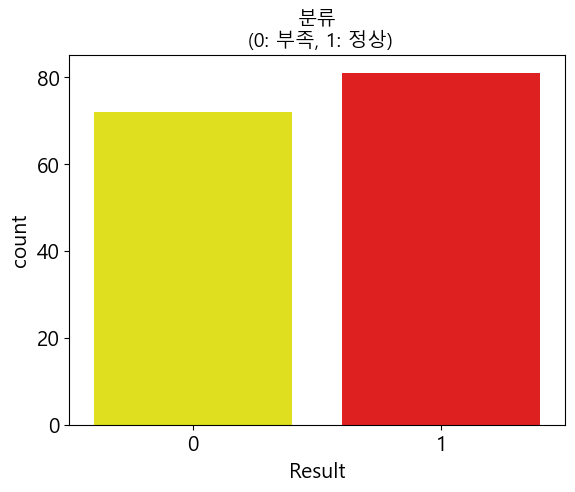

In [25]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
#한글 처리를 위해 폰트 설정
font_name = font_manager.FontProperties(\
fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import seaborn as sns
colors = ["yellow", "red"]
sns.countplot('Result', data=df, palette=colors)
plt.title('분류\n (0: 부족, 1: 정상)', fontsize=14)

In [27]:
train_cols = ['Solar.R','Wind','Temp']
X = df[train_cols]
y = df['Result']

In [28]:
#under sampling
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X,y)
X_samp = pd.DataFrame(data=X_sample, columns=train_cols)
y_samp = pd.DataFrame(data=y_sample, columns=['Result'])
df_samp = pd.concat([X_samp, y_samp], axis=1)

In [29]:
X = X_samp[train_cols]
y = y_samp['Result']

c:\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
c:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


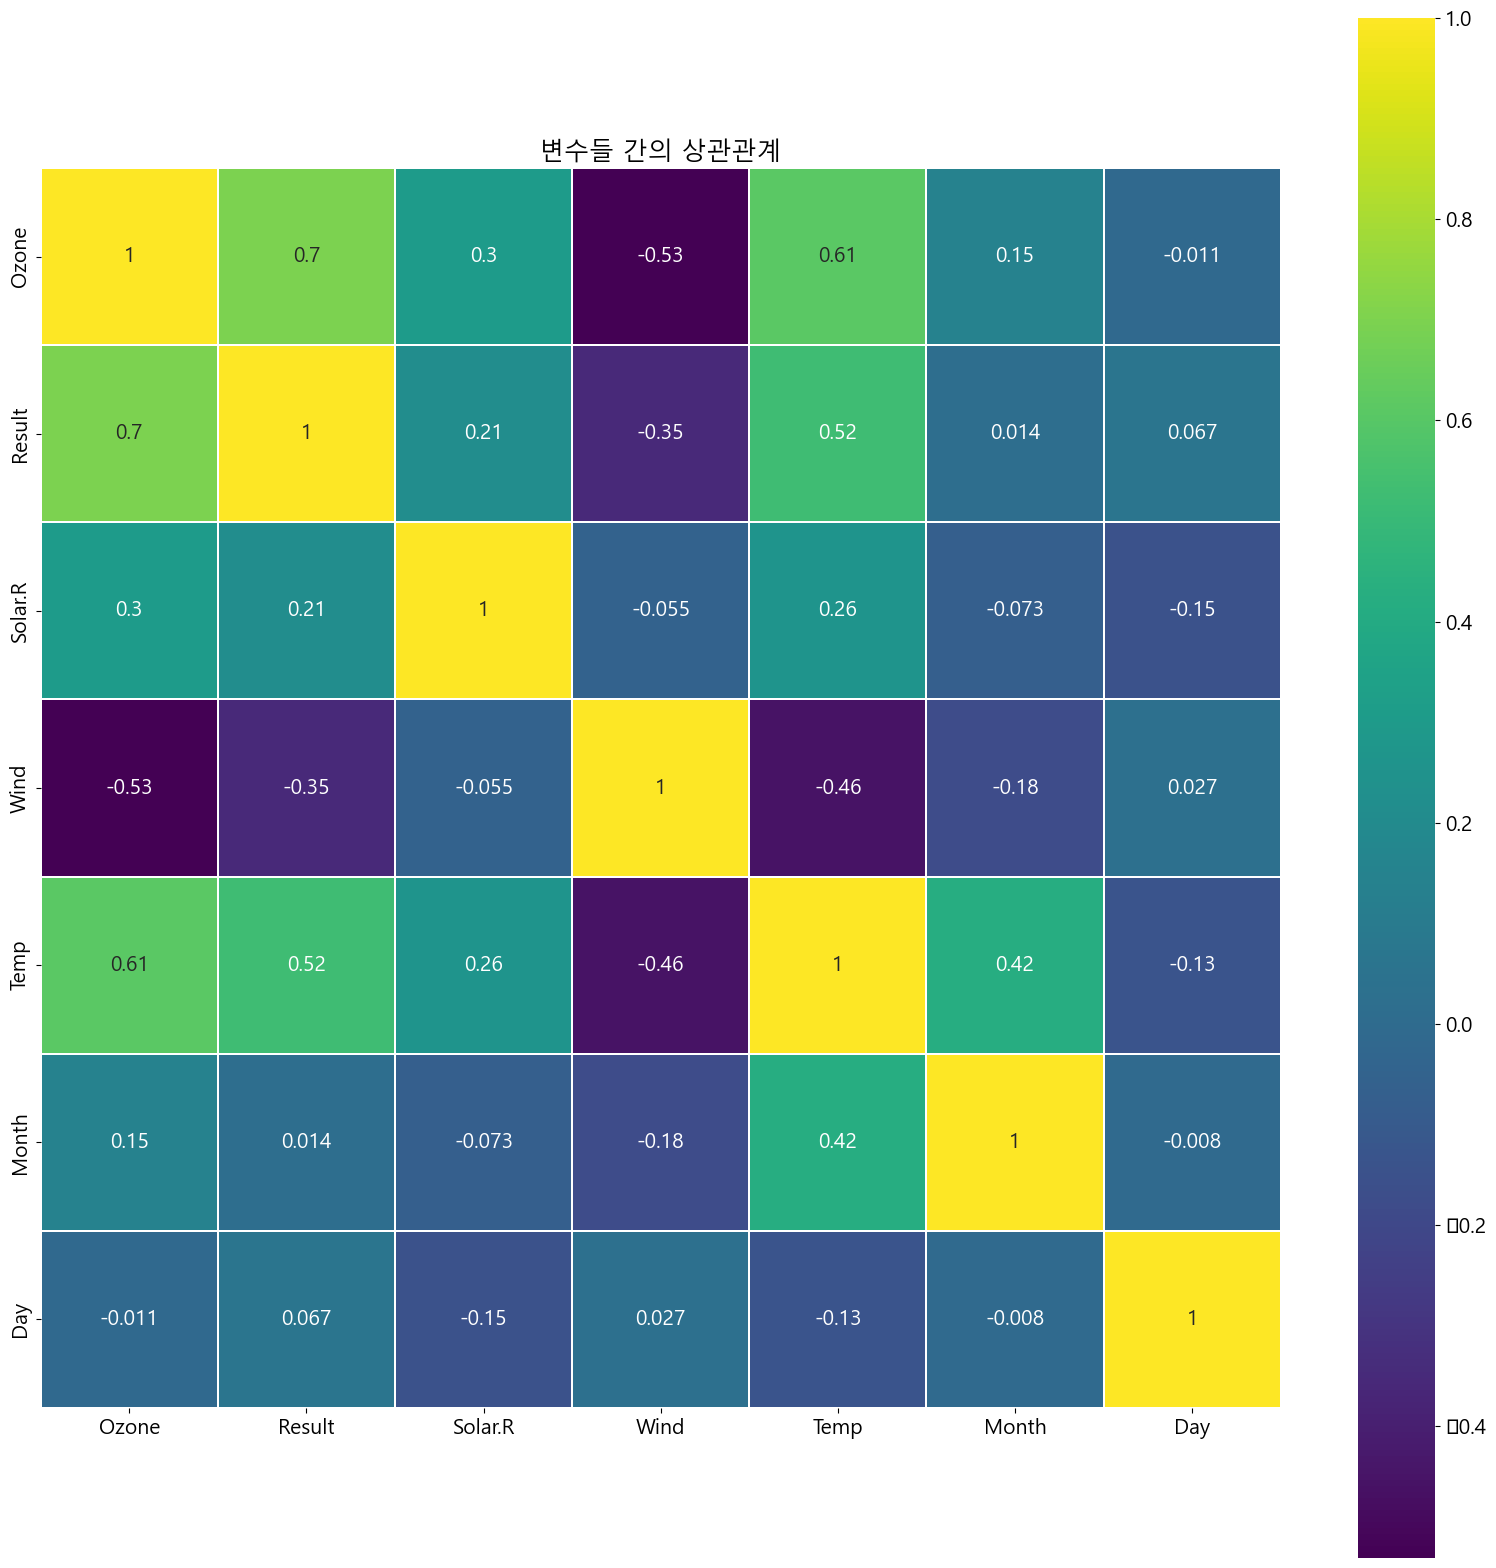

In [30]:
#상관계수 행렬 그래프
plt.figure(figsize=(20, 20))
plt.rc('font', size=15)
sns.heatmap(df.corr(), linewidths=0.01, square=True,
            annot=True, cmap=plt.cm.viridis,
            linecolor="white")
plt.title('변수들 간의 상관관계')
plt.show()

In [31]:
#데이터셋 구분
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
stratify=y,test_size=0.2, random_state=7)

In [39]:
# 모델 구성
from keras.models import Sequential
from keras.layers import Dense

model = Sequential(name='mymodel')
model.add(Dense(128, input_shape=(len(X_train.columns), ), activation='relu',
                name='hidden-1'))
model.add(Dense(64, activation='relu', name='hidden-2'))
model.add(Dense(64, activation='relu', name='hidden-3'))
model.add(Dense(1, activation='sigmoid', name='output'))

model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [40]:
model.summary()

Model: "mymodel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden-1 (Dense)            (None, 128)               512       
                                                                 
 hidden-2 (Dense)            (None, 64)                8256      
                                                                 
 hidden-3 (Dense)            (None, 64)                4160      
                                                                 
 output (Dense)              (None, 1)                 65        
                                                                 
Total params: 12,993
Trainable params: 12,993
Non-trainable params: 0
_________________________________________________________________


In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [34]:
# 스케일링 모델 저장
from joblib import dump
dump(scaler, 'c:/vscode/data/ozone/ozone.model', compress=True)

['c:/vscode/data/ozone/ozone.model']

In [35]:
# 모델 학습
hist = model.fit(X_train_scaled, y_train, epochs=1000)

Epoch 1/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2515 - accuracy: 0.5043
Epoch 2/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2296 - accuracy: 0.6522
Epoch 3/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.2143 - accuracy: 0.7565
Epoch 4/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.2018 - accuracy: 0.7565
Epoch 5/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.1915 - accuracy: 0.7652
Epoch 6/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.1816 - accuracy: 0.7652
Epoch 7/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1730 - accuracy: 0.7739
Epoch 8/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.1660 - accuracy: 0.7913
Epoch 9/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1602 - accuracy: 0.7826
Epoch 10/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1563 - accuracy: 0.7826
Epoch 11/1000
4/4 [

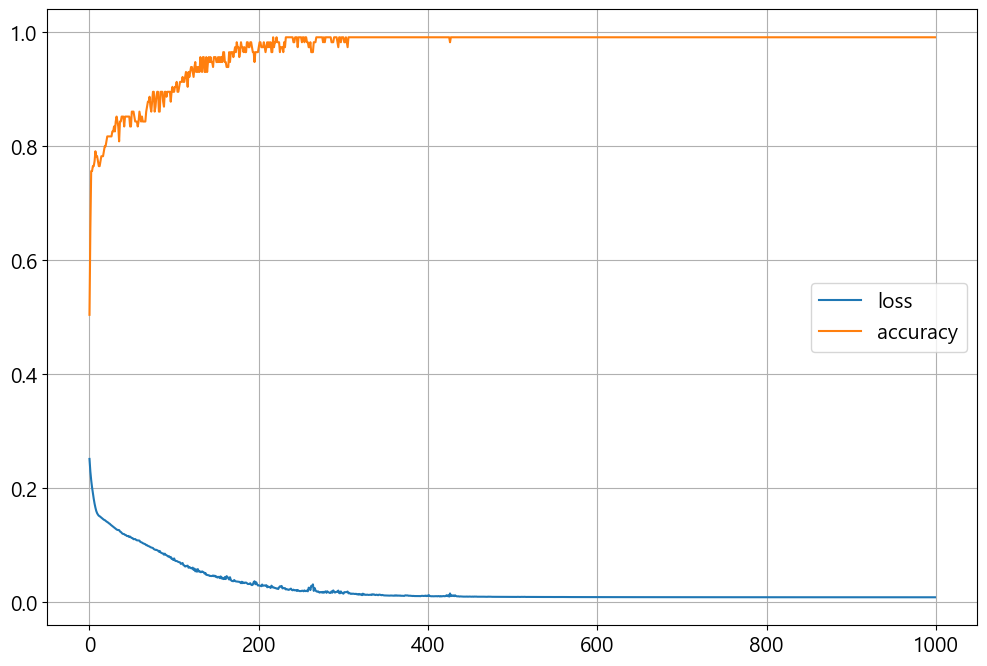

In [36]:
# 모델 학습 과정 표시
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss']) #학습용 데이터셋의 손실률
plt.plot(hist.history['accuracy']) #학습용 데이터셋의 정확도
plt.legend(['loss','accuracy'])
plt.grid()
plt.show()

In [37]:
# 모델 평가
#학습용
scores = model.evaluate(X_train_scaled, y_train)
print(scores)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))
#검증용
scores = model.evaluate(X_test_scaled, y_test)
print(scores)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

4/4 [==============================] - 0s 3ms/step - loss: 0.0087 - accuracy: 0.9913
[0.008749284781515598, 0.991304337978363]
accuracy: 99.13%
1/1 [==============================] - 0s 24ms/step - loss: 0.2376 - accuracy: 0.7241
[0.23757754266262054, 0.7241379022598267]
accuracy: 72.41%


In [38]:
model.save('c:/vscode/data/ozone/ozone.h5')

In [41]:
from datetime import datetime
import tensorflow as tf 
logdir="c:/logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")
    # 로그 저장 디렉토리
logdir

'c:/logs/20230414-160117'

In [42]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(X_train_scaled, y_train, epochs=500,callbacks=[tensorboard_callback])

Epoch 1/500
4/4 [==============================] - 0s 9ms/step - loss: 0.2444 - accuracy: 0.5304
Epoch 2/500
4/4 [==============================] - 0s 8ms/step - loss: 0.2259 - accuracy: 0.7130
Epoch 3/500
4/4 [==============================] - 0s 7ms/step - loss: 0.2136 - accuracy: 0.7478
Epoch 4/500
4/4 [==============================] - 0s 9ms/step - loss: 0.1995 - accuracy: 0.7739
Epoch 5/500
4/4 [==============================] - 0s 9ms/step - loss: 0.1878 - accuracy: 0.7739
Epoch 6/500
4/4 [==============================] - 0s 7ms/step - loss: 0.1776 - accuracy: 0.7739
Epoch 7/500
4/4 [==============================] - 0s 7ms/step - loss: 0.1685 - accuracy: 0.7739
Epoch 8/500
4/4 [==============================] - 0s 23ms/step - loss: 0.1620 - accuracy: 0.7652
Epoch 9/500
4/4 [==============================] - 0s 7ms/step - loss: 0.1574 - accuracy: 0.7652
Epoch 10/500
4/4 [==============================] - 0s 7ms/step - loss: 0.1539 - accuracy: 0.7652
Epoch 11/500
4/4 [==========

In [ ]:
# 텐서보드로 보기
# pip install tensorboard
# 아나콘다 프롬프트 열어서
# tensorboard --logdir=c:/logs/20230414-160117
# 결과로 뜨는 주소로 들어가기

#### creditcard

In [1]:
import pandas as pd
df = pd.read_csv("c:/vscode/data/creditcard.csv")

import seaborn as sns
import matplotlib.pyplot as plt
#한글 처리를 위해 폰트 설정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
train_cols = df.columns[1:30]

X = df[train_cols] # 독립변수
y = df["Class"]

In [3]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=train_cols )
y_samp = pd.DataFrame(data=y_sample,columns=['Class'])
df2=pd.concat([X_samp,y_samp],axis=1)

X = X_samp[train_cols] # 독립변수
y = y_samp["Class"]

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=10)

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

# 분류 모델 구현 함수
def make_model(input_number, hidden_layers, output_number):
    #모델 초기화
    model = Sequential(name='model1')
    model.add(Dense(hidden_layers[0], activation="relu", 
                    input_shape=(input_number,)))
    model.add(Dense(hidden_layers[1], activation="relu"))
    model.add(Dense(hidden_layers[2], activation="relu"))
    model.add(Dropout(0.2, name='Dropout'))
    model.add(Dense(output_number, activation="sigmoid",
                    name='Output'))
    model.compile(loss="mse", optimizer="adam", metrics=["accuracy"])
    return model

In [6]:
model = make_model(len(X_train.columns), [128,64,32], 1)
X_train_scaled = X_train
X_test_scaled = X_test

# 모델 학습
hist = model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
25/25 [==============================] - 2s 5ms/step - loss: 0.2017 - accuracy: 0.7281
Epoch 2/10
25/25 [==============================] - 0s 5ms/step - loss: 0.1287 - accuracy: 0.8615
Epoch 3/10
25/25 [==============================] - 0s 5ms/step - loss: 0.1546 - accuracy: 0.8412
Epoch 4/10
25/25 [==============================] - 0s 4ms/step - loss: 0.1302 - accuracy: 0.8590
Epoch 5/10
25/25 [==============================] - 0s 4ms/step - loss: 0.1386 - accuracy: 0.8526
Epoch 6/10
25/25 [==============================] - 0s 4ms/step - loss: 0.1127 - accuracy: 0.8844
Epoch 7/10
25/25 [==============================] - 0s 4ms/step - loss: 0.0744 - accuracy: 0.9136
Epoch 8/10
25/25 [==============================] - 0s 6ms/step - loss: 0.0726 - accuracy: 0.9212
Epoch 9/10
25/25 [==============================] - 0s 4ms/step - loss: 0.0877 - accuracy: 0.9085
Epoch 10/10
25/25 [==============================] - 0s 4ms/step - loss: 0.0676 - accuracy: 0.9263


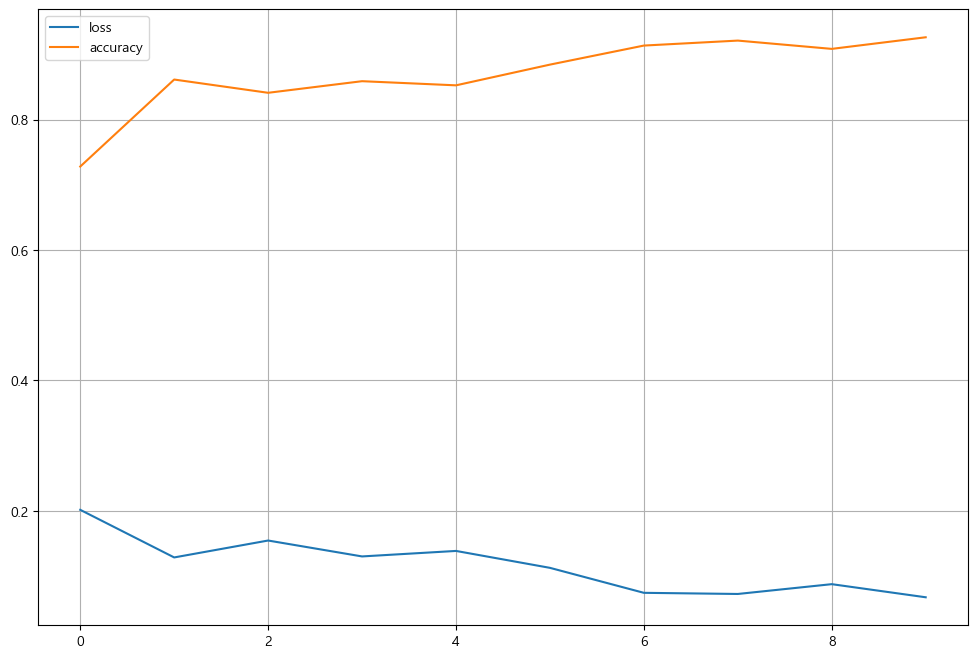

In [7]:
# 모델 학습 과정 표시
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss']) #손실률
plt.plot(hist.history['accuracy']) #정확도
plt.legend(['loss','accuracy'])
plt.grid()
plt.show()

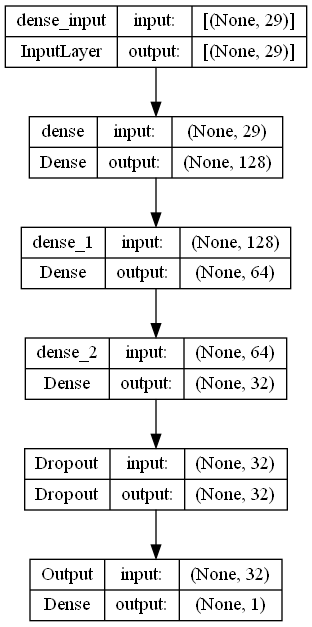

In [10]:
from keras.utils import plot_model  
plot_model(model,show_shapes=True)

In [8]:
# 모델 평가
#학습용
scores = model.evaluate(X_train_scaled, y_train, verbose=1)
print(scores)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))
#검증용
scores = model.evaluate(X_test_scaled, y_test, verbose=1)
print(scores)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

25/25 [==============================] - 0s 4ms/step - loss: 0.2075 - accuracy: 0.7675
[0.20750419795513153, 0.767471432685852]
accuracy: 76.75%
7/7 [==============================] - 0s 3ms/step - loss: 0.2103 - accuracy: 0.7614
[0.21030613780021667, 0.7614213228225708]
accuracy: 76.14%


In [16]:
import numpy as np
pred=model.predict(X_test)
print(pred[:5])
print(np.round(pred[:5]))

7/7 [==============================] - 0s 2ms/step
[[1.0000000e+00]
 [7.5629238e-08]
 [9.9983728e-01]
 [8.3875304e-01]
 [1.0000000e+00]]
[[1.]
 [0.]
 [1.]
 [1.]
 [1.]]


In [17]:
model.save('c:/vscode/data/creditcard.h5')

In [11]:
from datetime import datetime  
import tensorflow as tf  
logdir="c:/logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")  
logdir

'c:/logs/20230417-111958'

In [12]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)  
hist = model.fit(X_train_scaled, y_train, epochs=50,callbacks=[tensorboard_callback])

Epoch 1/50
25/25 [==============================] - 0s 6ms/step - loss: 0.1186 - accuracy: 0.8691
Epoch 2/50
25/25 [==============================] - 0s 5ms/step - loss: 0.0621 - accuracy: 0.9339
Epoch 3/50
25/25 [==============================] - 0s 5ms/step - loss: 0.0661 - accuracy: 0.9288
Epoch 4/50
25/25 [==============================] - 0s 6ms/step - loss: 0.0611 - accuracy: 0.9377
Epoch 5/50
25/25 [==============================] - 0s 4ms/step - loss: 0.0743 - accuracy: 0.9225
Epoch 6/50
25/25 [==============================] - 0s 3ms/step - loss: 0.0461 - accuracy: 0.9504
Epoch 7/50
25/25 [==============================] - 0s 4ms/step - loss: 0.0470 - accuracy: 0.9504
Epoch 8/50
25/25 [==============================] - 0s 3ms/step - loss: 0.0473 - accuracy: 0.9492
Epoch 9/50
25/25 [==============================] - 0s 4ms/step - loss: 0.0520 - accuracy: 0.9428
Epoch 10/50
25/25 [==============================] - 0s 4ms/step - loss: 0.0473 - accuracy: 0.9517
Epoch 11/50
25/25 [

#### rides

In [18]:
df = pd.read_csv("c:/vscode/data/rides/rides2.csv")

In [19]:
train_cols = df.columns[0:7]
X = df[train_cols]
y = df['overall']

array([[<AxesSubplot:xlabel='weekend', ylabel='weekend'>,
        <AxesSubplot:xlabel='num.child', ylabel='weekend'>,
        <AxesSubplot:xlabel='distance', ylabel='weekend'>,
        <AxesSubplot:xlabel='rides', ylabel='weekend'>,
        <AxesSubplot:xlabel='games', ylabel='weekend'>,
        <AxesSubplot:xlabel='wait', ylabel='weekend'>,
        <AxesSubplot:xlabel='clean', ylabel='weekend'>,
        <AxesSubplot:xlabel='overall', ylabel='weekend'>],
       [<AxesSubplot:xlabel='weekend', ylabel='num.child'>,
        <AxesSubplot:xlabel='num.child', ylabel='num.child'>,
        <AxesSubplot:xlabel='distance', ylabel='num.child'>,
        <AxesSubplot:xlabel='rides', ylabel='num.child'>,
        <AxesSubplot:xlabel='games', ylabel='num.child'>,
        <AxesSubplot:xlabel='wait', ylabel='num.child'>,
        <AxesSubplot:xlabel='clean', ylabel='num.child'>,
        <AxesSubplot:xlabel='overall', ylabel='num.child'>],
       [<AxesSubplot:xlabel='weekend', ylabel='distance'>,
       

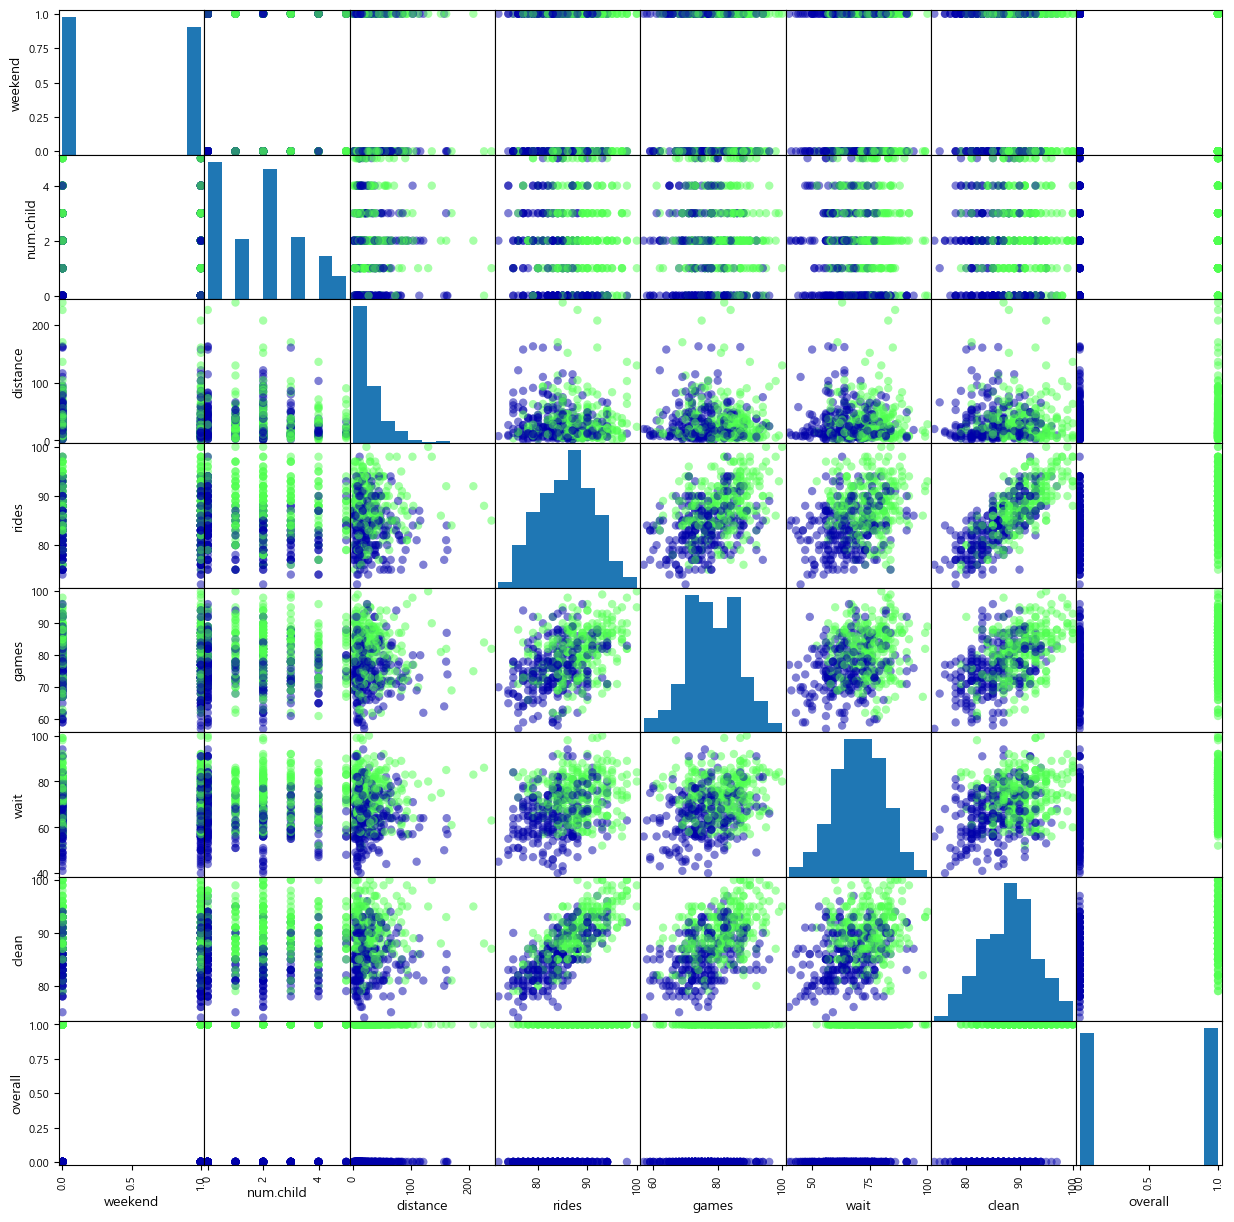

In [20]:
import mglearn
#산점도 행렬 출력
pd.plotting.scatter_matrix(df, c=y, figsize=(15,15),marker='o', cmap=mglearn.cm3)

In [21]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=train_cols )
y_samp = pd.DataFrame(data=y_sample,columns=['overall'])
df_samp=pd.concat([X_samp,y_samp],axis=1)

X = df_samp[train_cols]
y = df_samp['overall']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=10)

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
# 분류 모델 구현 함수
def make_model(input_number, hidden_layers, output_number):
    model = Sequential()
    model.add(Dense(hidden_layers[0], activation='relu',
                    input_shape=(input_number,),
                    name='Hidden-1'))
    model.add(Dense(hidden_layers[1], activation='relu', name='Hidden-2'))
    model.add(Dense(hidden_layers[2], activation='relu', name='Hidden-3'))
    model.add(Dropout(0.2))
    model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
    return model

In [23]:
model = make_model(len(X_train.columns), [128,64,32], 1)

<AxesSubplot:>

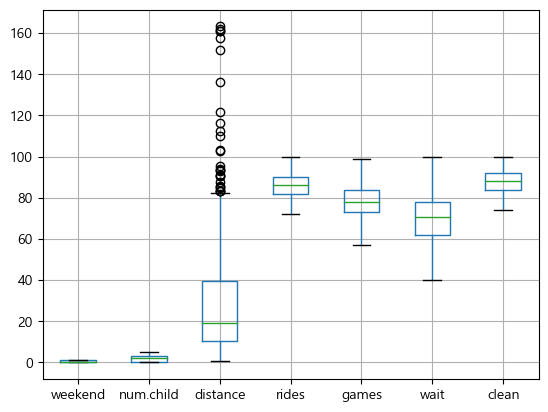

In [24]:
X_train.boxplot()

[[1.         0.         0.10977143 ... 0.5952381  0.16666667 0.65384615]
 [1.         0.4        0.13554088 ... 0.28571429 0.43333333 0.19230769]
 [0.         0.6        0.06495305 ... 0.5        0.48333333 0.30769231]
 ...
 [0.         0.6        0.0730179  ... 0.66666667 0.68333333 0.73076923]
 [1.         0.4        0.41020732 ... 0.33333333 0.3        0.5       ]
 [1.         0.4        0.31775348 ... 0.4047619  0.68333333 0.46153846]]


<AxesSubplot:>

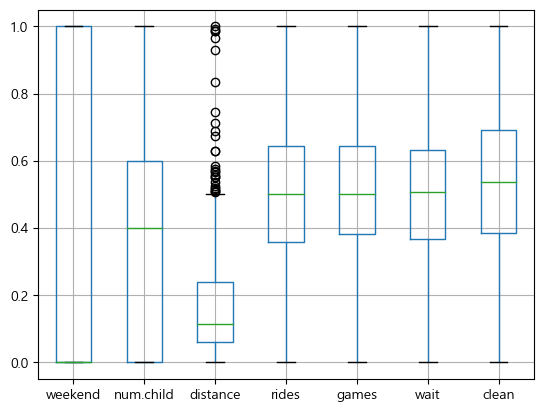

In [25]:
#0~1 범위 변환
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled)
df3=pd.DataFrame(X_train_scaled,columns=train_cols)
df3.boxplot()

In [ ]:
# 모델 학습1
hist = model.fit(X_train_scaled, y_train, epochs=100)

In [37]:
# 모델 학습2
from keras.callbacks import EarlyStopping

tb = tf.keras.callbacks.TensorBoard(log_dir=logdir)
es = EarlyStopping(monitor='val_loss', patience=5)
hist = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, callbacks=[tb,es])

Epoch 1/100
10/10 [==============================] - 0s 18ms/step - loss: 0.2322 - accuracy: 0.2460 - val_loss: 0.1935 - val_accuracy: 0.2152
Epoch 2/100
10/10 [==============================] - 0s 10ms/step - loss: 0.2300 - accuracy: 0.2396 - val_loss: 0.1912 - val_accuracy: 0.2025
Epoch 3/100
10/10 [==============================] - 0s 11ms/step - loss: 0.2284 - accuracy: 0.2173 - val_loss: 0.2004 - val_accuracy: 0.2405
Epoch 4/100
10/10 [==============================] - 0s 9ms/step - loss: 0.2338 - accuracy: 0.2556 - val_loss: 0.1899 - val_accuracy: 0.2025
Epoch 5/100
10/10 [==============================] - 0s 10ms/step - loss: 0.2333 - accuracy: 0.2556 - val_loss: 0.1970 - val_accuracy: 0.2532
Epoch 6/100
10/10 [==============================] - 0s 9ms/step - loss: 0.2330 - accuracy: 0.2332 - val_loss: 0.1934 - val_accuracy: 0.2278
Epoch 7/100
10/10 [==============================] - 0s 10ms/step - loss: 0.2300 - accuracy: 0.2492 - val_loss: 0.1933 - val_accuracy: 0.2152
Epoch 8/

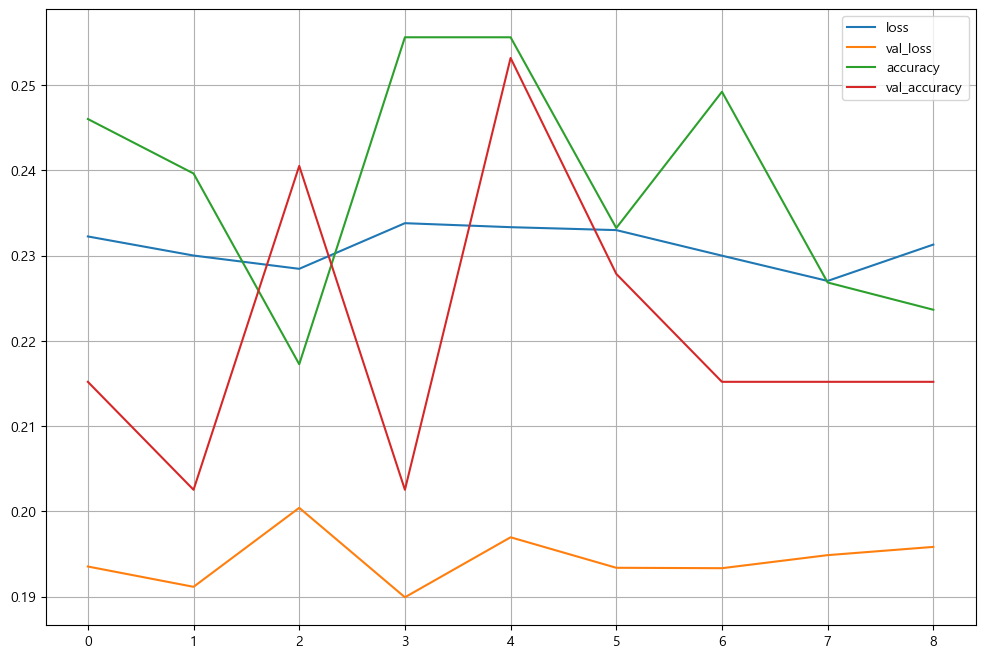

In [39]:
# 모델 학습 과정 표시
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss']) #손실률
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy']) #정확도
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','val_loss','accuracy','val_accuracy'])
plt.grid()
plt.show()

In [40]:
# 모델 평가
scores = model.evaluate(X_train_scaled, y_train, verbose=1)
print(scores)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))
#학습용
scores = model.evaluate(X_test_scaled, y_test, verbose=1)
print(scores)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))
#검증용

13/13 [==============================] - 0s 4ms/step - loss: 0.1843 - accuracy: 0.2449
[0.1842503398656845, 0.2448979616165161]
accuracy: 24.49%
4/4 [==============================] - 0s 3ms/step - loss: 0.2316 - accuracy: 0.2347
[0.23157285153865814, 0.23469388484954834]
accuracy: 23.47%


In [42]:
model.save('c:/vscode/data/rides/rides.h5')
# model.save('c:/vscode/data/rides/rides_keras.model')
# model.save_weights('c:/vscode/data/rides/rides.weight')

In [41]:
pred=model.predict(X_test_scaled[:5])
pred

1/1 [==============================] - 0s 21ms/step


array([[0.        , 0.71196055, 0.6836354 , 0.67577386, 0.67735606,
        0.        , 0.        , 0.7268921 , 0.7170635 , 0.70684916,
        0.71411514, 0.69319886, 0.68602675, 0.        , 0.68956393,
        0.7041742 , 0.6731502 , 0.66718495, 0.6931351 , 0.7127827 ,
        0.656374  , 0.7073171 , 0.        , 0.7108982 , 0.6725208 ,
        0.70730096, 0.        , 0.7299751 , 0.69023734, 0.6798026 ,
        0.        , 0.6965505 ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.    

In [33]:
#새로운 값 예측(주말여부, 자녀수, 거리, 놀이기구만족도, 게임만족도, 대기시간, 청결도)
from sklearn.preprocessing import MinMaxScaler

test_set = np.array([0, 2, 20, 84, 78, 67, 89]).reshape(1,7)
test_set_scaled=scaler.transform(test_set)
print(model.predict(test_set_scaled))

1/1 [==============================] - 0s 19ms/step
[[0.         0.53993356 0.53012866 0.5382423  0.5447267  0.
  0.         0.5303167  0.53338045 0.5465623  0.5282906  0.54883504
  0.5470868  0.         0.541347   0.53242457 0.556844   0.5554055
  0.54068613 0.54762894 0.5330347  0.542876   0.         0.541993
  0.5471165  0.5403479  0.         0.5270603  0.5579364  0.5518569
  0.         0.5279878 ]]


c:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [34]:
import joblib
#scaler 백업
joblib.dump(scaler, 'c:/vscode/data/rides/scaler.sav')

['c:/vscode/data/rides/scaler.sav']

#### 대학평가

In [43]:
df = pd.read_csv("c:/vscode/data/school/data.csv")

In [44]:
train_cols = df.columns[0:8]
X = df[train_cols]
y = df["Label"]

In [45]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=train_cols )
y_samp = pd.DataFrame(data=y_sample,columns=['Label'])
df_samp=pd.concat([X_samp,y_samp],axis=1)

X = df_samp[train_cols] # 독립변수
y = df_samp["Label"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=10)

In [46]:
from keras import Sequential
from keras.layers import Dense

class MyModel(Sequential):
    def __init__(self, input_nodes, hidden_layers,num_classes):
        super(MyModel, self).__init__(name='my_model')
        self.num_classes = num_classes
        self.add(Dense(hidden_layers[0],
                    input_shape=(input_nodes,), activation='relu'))
        self.add(Dense(hidden_layers[1], activation='relu'))
        self.add(Dense(hidden_layers[2], activation='relu'))
        self.add(Dense(num_classes, activation='sigmoid'))

model = MyModel(len(X_train.columns), [128,64,32],1)
model.compile(optimizer="adam", loss='mse', metrics=['accuracy'])

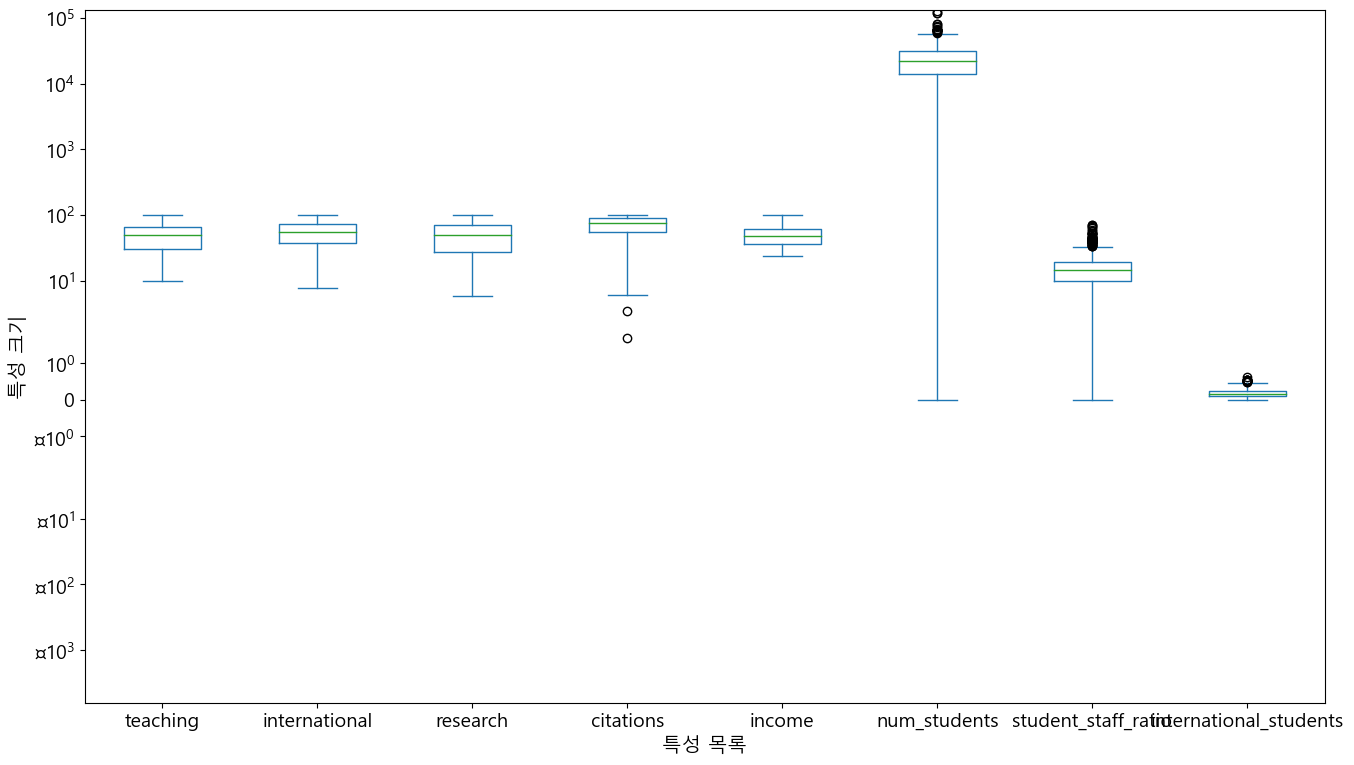

In [47]:
plt.rcParams["figure.figsize"]=(16,9)
plt.rcParams["font.size"]=14
df_samp[train_cols].plot.box()
plt.yscale("symlog")
plt.xlabel("특성 목록")
plt.ylabel("특성 크기")
plt.show()

In [48]:
# 학습용 데이터셋에서 특성별 최소값 계산
min_on_tr = X_train.min(axis=0)
# 학습용 데이터셋에서 특성별 (최대값 - 최소값) 범위 계산
range_on_tr = (X_train - min_on_tr).max(axis=0)
# 학습용 데이터셋에서 최소값을 빼고 범위로 나누면
# 각 특성에 대해 최소값은 0 최대값은 1로 조정됨
X_train_scaled = (X_train - min_on_tr) / range_on_tr
print("특성별 최소값\n{0}".format(X_train_scaled.min(axis=0)))
print("특성별 최대값\n{0}".format(X_train_scaled.max(axis=0)))

# 검증용 데이터셋에도 같은 작업을 적용
# 학습용 데이터셋에서 계산한 최소값과 범위를 사용
X_test_scaled = (X_test - min_on_tr) / range_on_tr

특성별 최소값
teaching                  0.0
international             0.0
research                  0.0
citations                 0.0
income                    0.0
num_students              0.0
student_staff_ratio       0.0
international_students    0.0
dtype: float64
특성별 최대값
teaching                  1.0
international             1.0
research                  1.0
citations                 1.0
income                    1.0
num_students              1.0
student_staff_ratio       1.0
international_students    1.0
dtype: float64


Epoch 1/50
23/23 [==============================] - 1s 5ms/step - loss: 0.2318 - accuracy: 0.6222
Epoch 2/50
23/23 [==============================] - 0s 4ms/step - loss: 0.1792 - accuracy: 0.8750
Epoch 3/50
23/23 [==============================] - 0s 3ms/step - loss: 0.1056 - accuracy: 0.9073
Epoch 4/50
23/23 [==============================] - 0s 3ms/step - loss: 0.0689 - accuracy: 0.9199
Epoch 5/50
23/23 [==============================] - 0s 3ms/step - loss: 0.0552 - accuracy: 0.9256
Epoch 6/50
23/23 [==============================] - 0s 3ms/step - loss: 0.0550 - accuracy: 0.9284
Epoch 7/50
23/23 [==============================] - 0s 4ms/step - loss: 0.0424 - accuracy: 0.9494
Epoch 8/50
23/23 [==============================] - 0s 3ms/step - loss: 0.0383 - accuracy: 0.9551
Epoch 9/50
23/23 [==============================] - 0s 3ms/step - loss: 0.0439 - accuracy: 0.9396
Epoch 10/50
23/23 [==============================] - 0s 3ms/step - loss: 0.0310 - accuracy: 0.9607
Epoch 11/50
23/23 [

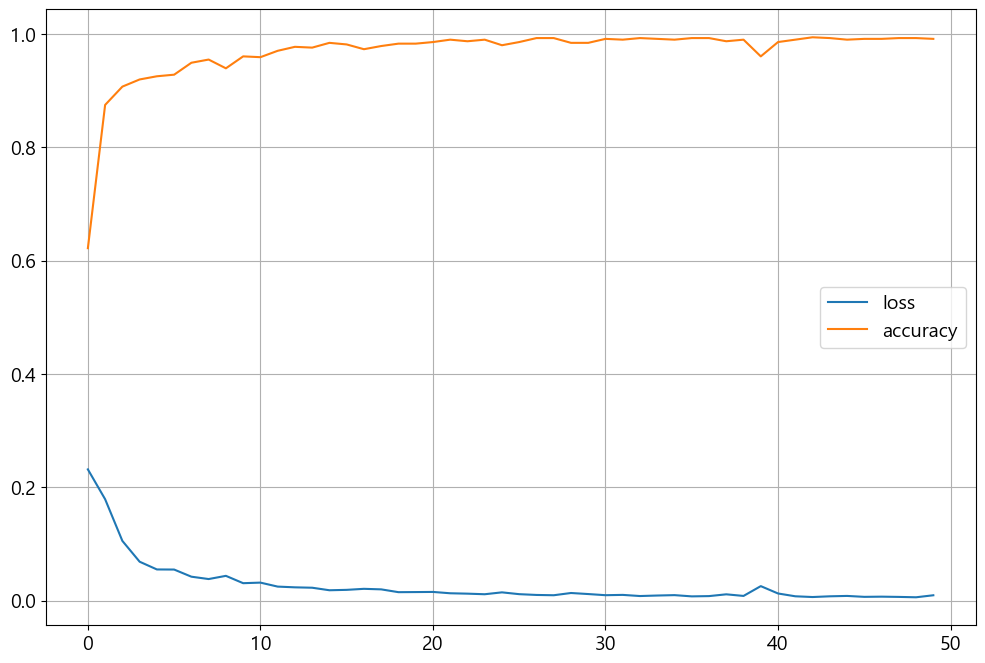

In [49]:
# 5. 모델 학습
hist = model.fit(X_train_scaled, y_train, epochs=50)

plt.figure(figsize=(12,8))
plt.plot(hist.history['loss']) #손실률
plt.plot(hist.history['accuracy']) #정확도
plt.legend(['loss','accuracy'])
plt.grid()
plt.show()

In [50]:
# 7. 모델 평가
scores = model.evaluate(X_train_scaled, y_train, verbose=1)
print(scores)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))
#학습용
scores = model.evaluate(X_test_scaled, y_test, verbose=1)
print(scores)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))
#검증용

23/23 [==============================] - 0s 4ms/step - loss: 0.0057 - accuracy: 0.9972
[0.0057222903706133366, 0.9971910119056702]
accuracy: 99.72%
6/6 [==============================] - 0s 3ms/step - loss: 0.0061 - accuracy: 0.9944
[0.006087036803364754, 0.9943820238113403]
accuracy: 99.44%


#### 신경망 교차검증

In [51]:
import numpy as np
from tensorflow.keras import models
from tensorflow.keras import layers
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
# 랜덤 시드를 설정
np.random.seed(0)
# 특성 개수
number_of_features = 100
# 특성 행렬과 타깃 벡터
features, target = make_classification(n_samples = 10000,
                        n_features = number_of_features,
                        n_informative = 3,
                        n_redundant = 0,
                        n_classes = 2,
                        weights = [.5, .5],
                        random_state = 0)

In [52]:
from scikeras.wrappers import KerasClassifier

def create_network():
    # 신경망 모델
    network = models.Sequential()
    # 렐루 활성화 함수를 사용한 완전 연결 층을 추가
    network.add(layers.Dense(units=16, activation="relu",
                        input_shape=(number_of_features,)))
    # 렐루 활성화 함수를 사용한 완전 연결 층을 추가
    network.add(layers.Dense(units=16, activation="relu"))
    # 시그모이드 활성화 함수를 사용한 완전 연결 층을 추가
    network.add(layers.Dense(units=1, activation="sigmoid"))
    # 신경망의 모델 설정을 완료
    network.compile(loss="binary_crossentropy", # 크로스 엔트로피
                    optimizer="rmsprop", # 옵티마이저
                    metrics=["accuracy"]) # 성능 지표
    # 설정 완료된 모델을 반환
    return network

In [53]:
neural_network = KerasClassifier(model=create_network,
                                epochs=10,
                                batch_size=100,
                                verbose=0)

# 3-폴드 교차검증을 사용하여 신경망을 평가
cross_val_score(neural_network, features, target, cv=3)

array([0.89832034, 0.91329133, 0.81218122])

* 2. 하이퍼 파라미터 튜닝

In [67]:
#시간이 오래 걸림
import numpy as np
from keras import models
from keras import layers
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

# 랜덤 시드를 설정
np.random.seed(0)
# 특성 개수
number_of_features = 10

# 특성 행렬과 타깃 벡터
features, target = make_classification(n_samples = 100,
                                        n_features = number_of_features,
                                        n_informative = 3,
                                        n_redundant = 0,
                                        n_classes = 2,
                                        weights = [.5, .5],
                                        random_state = 0)

In [63]:
def create_network(optimizer="rmsprop"):
    # 신경망 모델
    network = models.Sequential()
    # 렐루 활성화 함수를 사용한 완전 연결 층을 추가
    network.add(layers.Dense(units=16, activation="relu",
                        input_shape=(number_of_features,)))
    # 렐루 활성화 함수를 사용한 완전 연결 층을 추가
    network.add(layers.Dense(units=16, activation="relu"))
    # 시그모이드 활성화 함수를 사용한 완전 연결 층을 추가
    network.add(layers.Dense(units=1, activation="sigmoid"))
    # 신경망의 모델 설정을 완료
    network.compile(loss="binary_crossentropy", # 크로스 엔트로피
                    optimizer=optimizer, # 옵티마이저
                    metrics=["accuracy"]) # 성능 지표
    # 설정 완료된 모델을 반환
    return network

In [68]:
neural_network = KerasClassifier(model=create_network, verbose=0)

# 하이퍼파라미터 탐색 영역을 정의
epochs = [5, 10]
batches = [5, 10, 100]
optimizers = ["rmsprop", "adam"]
# 하이퍼파라미터 그리드
hyperparameters = dict(optimizer=optimizers, epochs=epochs,
                        batch_size=batches)
# 그리드 서치
grid = GridSearchCV(estimator=neural_network, param_grid=hyperparameters)
# 그리드 서치를 수행
grid_result = grid.fit(features, target)

# 신경망 하이퍼파라미터를 확인
grid_result.best_params_
grid_result.cv_results_['mean_test_score']
grid_result.best_estimator_

KerasClassifier(
	model=<function create_network at 0x000001D99171A3A0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=5
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=10
	class_weight=None
)